# Pymaceuticals Inc.
---

### Analysis

- Treatment regimens for Capomulin and Ramicane were most effective in reducing tumor volume,  with the fewest outliers.

- The study that used Capomulin shows that tumor volume was directly proportional to the weight of the mouse.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "/data/Mouse_metadata.csv"
study_results_path = "/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
agg_mouse_data = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
agg_mouse_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [19]:
# Checking the number of mice.
count_mice = agg_mouse_data['Mouse ID'].nunique()
count_mice

249

In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = agg_mouse_data[agg_mouse_data.duplicated(subset= ["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_tot = agg_mouse_data[agg_mouse_data.duplicated(subset= ["Mouse ID", "Timepoint"], keep= False)]
duplicate_mice_tot

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = agg_mouse_data.loc[agg_mouse_data["Mouse ID"]!="g989"]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [24]:
# Checking the number of mice in the clean DataFrame.
count_mice_clean = cleaned_data['Mouse ID'].nunique()
count_mice_clean

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = cleaned_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_df_mean = summary_df["Tumor Volume (mm3)"].mean()
summary_df_median = summary_df["Tumor Volume (mm3)"].median()
summary_df_variance = summary_df["Tumor Volume (mm3)"].var()
summary_df_std = summary_df["Tumor Volume (mm3)"].std()
summary_df_sem = summary_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_grouped = pd.DataFrame({"Mean": summary_df_mean, "Median": summary_df_median, "Variance": summary_df_variance, "Standard Deviation": summary_df_std, "SEM":summary_df_sem})
summary_grouped

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_simple =  cleaned_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_simple

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

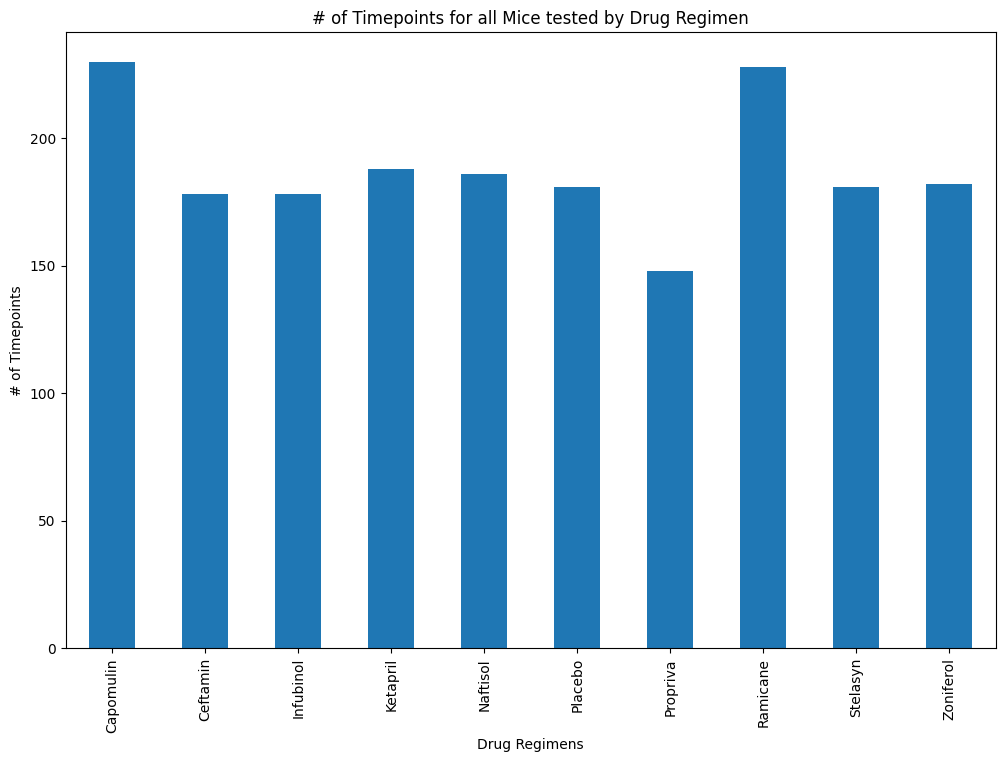

<Figure size 640x480 with 0 Axes>

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_times = cleaned_data.groupby('Drug Regimen')
timepoint_total = drug_regimen_times['Timepoint'].count()
time_by_regimen = timepoint_total.plot(kind= 'bar', figsize=(12, 8))

#setting title and labels
time_by_regimen.set_xlabel("Drug Regimens")
time_by_regimen.set_ylabel("# of Timepoints")
plt.title("# of Timepoints for all Mice tested by Drug Regimen")
plt.show()
plt.tight_layout()


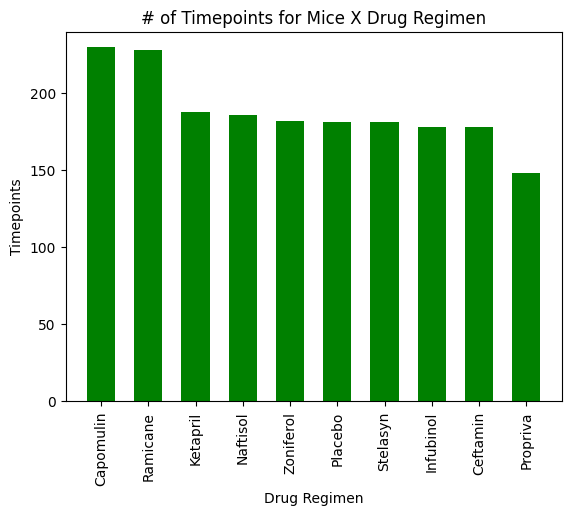

<Figure size 640x480 with 0 Axes>

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_pyplot = cleaned_data['Drug Regimen'].value_counts()

#set axes
x_axis = timepoint_pyplot.index
y_axis = timepoint_pyplot.values

plt.bar(x_axis, y_axis, color = "g", align = "center", width= .6)

#label and tick cleanup
plt.title("# of Timepoints for Mice X Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation ='vertical')
plt.xlim(-.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)
plt.show()
plt.tight_layout()

In [29]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender = cleaned_data["Sex"].value_counts()
gender


,count
Sex,
Male,958
Female,922


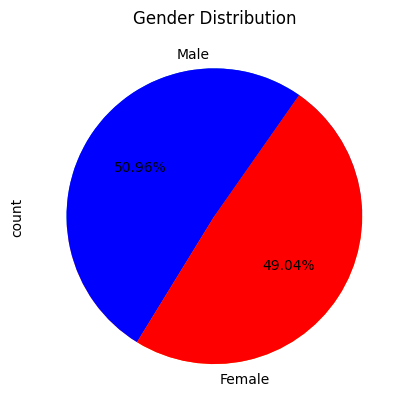

In [30]:
# Make the pie chart
gender_pie=gender.plot(kind='pie')
colors = ['blue', 'red']
plt.pie(gender, colors=colors, autopct="%.2f%%", startangle=55)
plt.title('Gender Distribution')
plt.show()

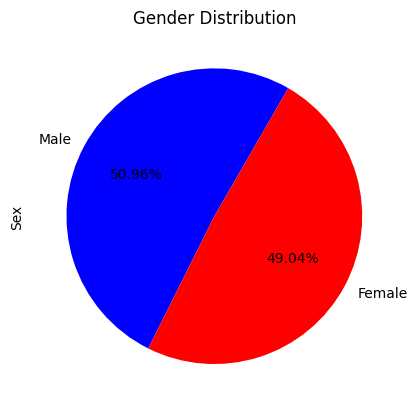

In [31]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
#set the labels and values
labels=list(gender.index)
#set the colors
colors = ['blue','red']

plt.pie(gender,labels=labels, colors=colors,autopct="%.2f%%",startangle=60)
plt.title('Gender Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: # Capomulin, Ramicane, Infubinol, and Ceftamin
drugs=cleaned_data.loc[(cleaned_data['Drug Regimen']=='Capomulin')|
                                   (cleaned_data['Drug Regimen']=='Ramicane')|
                                   (cleaned_data['Drug Regimen']=='Infubinol')|
                                   (cleaned_data['Drug Regimen']=='Ceftamin'),:]

# Start by getting the last (greatest) timepoint for each mouse
maxtime_drugs=drugs.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drugs=pd.merge(drugs,cleaned_data[['Mouse ID','Timepoint','Tumor Volume (mm3)']], on=['Mouse ID','Timepoint'], how='left')
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y
0,a203,Infubinol,Female,20,23,0,45.000000,0,45.000000
1,a203,Infubinol,Female,20,23,5,48.508468,0,48.508468
2,a203,Infubinol,Female,20,23,10,51.852437,1,51.852437
3,a203,Infubinol,Female,20,23,15,52.777870,1,52.777870
4,a203,Infubinol,Female,20,23,20,55.173336,1,55.173336


In [37]:
# Put treatments into a list for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[]for i in range(4)]
for x in range(100):
        drug= drugs.iloc[x,:]['Drug Regimen']
        tum= drugs.iloc[x,:]['Tumor Volume (mm3)_x']
        for y in range(4):
            if drug==treatment_list[y]:
                Tumors[y].append(tum)
                continue
# Calculate the IQR and quantitatively determine if there are any potential outliers.
q1= [[] for i in range(4)]
q3= [[] for i in range(4)]
qrt=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_limit=[[] for i in range(4)]
upper_limit=[[] for i in range(4)]
pot_outls=[[] for i in range(4)]

    ### Locate the rows which contain mice on each drug and get the tumor volumes
for n, num in enumerate(treatment_list):
    qrt[n] = drugs.loc[drugs["Drug Regimen"]==num,:]["Tumor Volume (mm3)_x"].quantile([.25,0.5,.75])
    q1[n] = qrt[n][0.25]
    q3[n] = qrt[n][0.75]
    iqr[n] = q3[n]-q1[n]


#Add the tumor volumes of mice and add to tumor_volume_data.Group that data  by treatment_list.

# Determine outliers using upper and lower bounds for each treatment in tumor_volume data

    print(f"The lower quartile of {num} tumor volume is: {q1[n]}")
    print(f"The upper quartile of {num} tumor volume is: {q3[n]}")
    print(f"The interquartile range of {num} tumor volume is: {iqr[n]}")
    print(f"The median of {num} tumor volume is: {qrt[n][0.5]}")


    lower_limit[n] = q1[n] - (1.5*iqr[n])
    upper_limit[n] = q3[n] + (1.5*iqr[n])
    print(f"Values below {lower_limit[n]} could be outliers.")
    print(f"Values above {upper_limit[n]} could be outliers.")

    for t in Tumors [n]:
        if t>upper_limit[n] or t< lower_limit[n]:
            pot_outls[n].append(t)

    if len(pot_outls[n])>0:
        print(f"The potential outlier for {num} is: {pot_outls[n]}\n")
    else:
        print(f"There are no potential outliers for {num}.\n")


The lower quartile of Capomulin tumor volume is: 37.685932865
The upper quartile of Capomulin tumor volume is: 45.0
The interquartile range of Capomulin tumor volume is: 7.314067135000002
The median of Capomulin tumor volume is: 41.557808879999996
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
There are no potential outliers for Capomulin.

The lower quartile of Ramicane tumor volume is: 36.674634585
The upper quartile of Ramicane tumor volume is: 45.0
The interquartile range of Ramicane tumor volume is: 8.325365415
The median of Ramicane tumor volume is: 40.67323554
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
There are no potential outliers for Ramicane.

The lower quartile of Infubinol tumor volume is: 47.3123533
The upper quartile of Infubinol tumor volume is: 57.314443967500004
The interquartile range of Infubinol tumor volume is: 10.002090667500006
The median of Infubinol tumor v

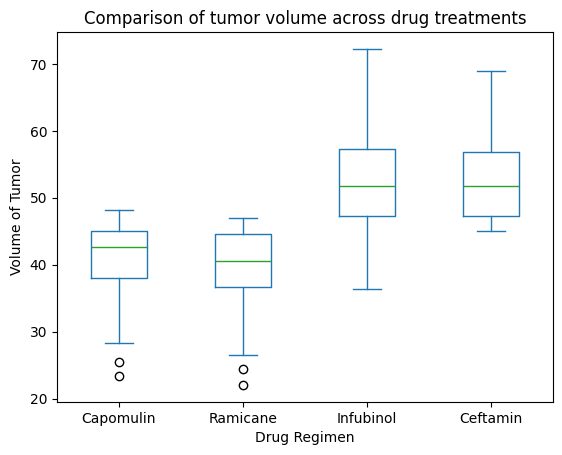

In [44]:
# Generate a box plot that shows the distribution of the Tumor Volume (3mm)_x for each drug regimen in drugs
# Filter the dataframe for the desired drug regimens
filtered_drugs = drugs[drugs['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Group by 'Drug Regimen' and get the 'Tumor Volume (mm3)_x' values as lists
tumor_volumes = filtered_drugs.groupby('Drug Regimen')['Tumor Volume (mm3)_x'].apply(list).reset_index()

# Create a dictionary where keys are drug regimens and values are tumor volume lists
# Use the minimum length of the tumor volume lists to ensure all lists have the same length
min_len = min(len(volumes) for volumes in tumor_volumes['Tumor Volume (mm3)_x'])
data = {regimen: volumes[:min_len] for regimen, volumes in zip(tumor_volumes['Drug Regimen'], tumor_volumes['Tumor Volume (mm3)_x'])}

# Create the DataFrame
data_df = pd.DataFrame(data)

# Create the box plot
ax = data_df[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']].plot(kind='box', title="Distribution of Tumor volumes across Drug Treatments")
ax.set(title='Comparison of tumor volume across drug treatments', xlabel="Drug Regimen", ylabel='Volume of Tumor')
plt.show()


## Line and Scatter Plots

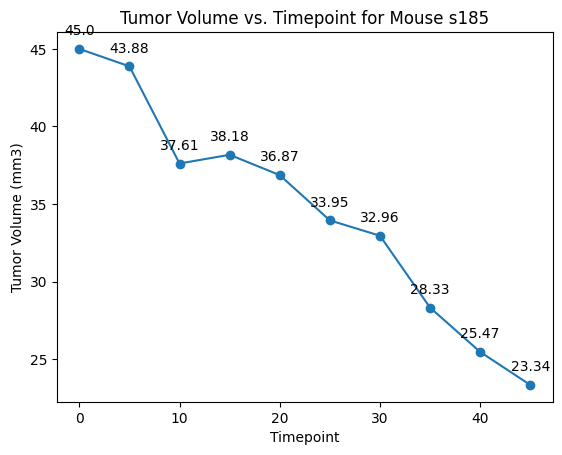

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for Mouse s185')
#add datalabels on the trendline for all tumor volume data points to 2 decimal places on 90 degree rotation
for x, y in zip(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)']):
    plt.annotate(str(round(y, 2)), (x, y), textcoords
                 ="offset points", xytext=(0, 10), ha='center')
plt.show()

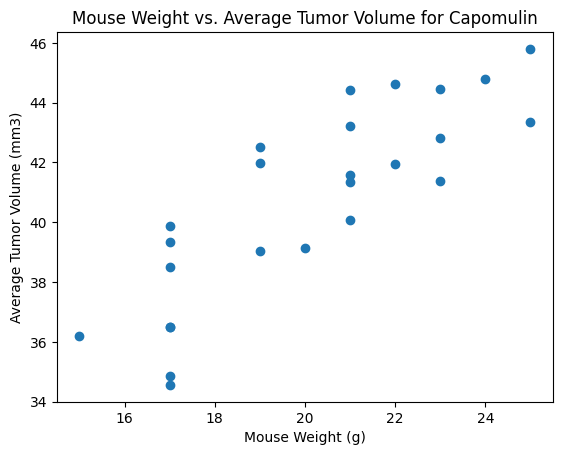

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen and add a trendline for the observations
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(mouse_weight, tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.show()

## Correlation and Regression

In [56]:
# Calculate the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")



The correlation between mouse weight and average tumor volume is 0.84


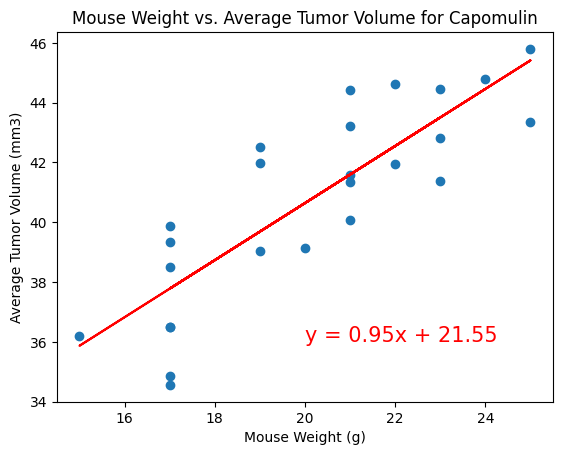

In [58]:
# Calculate the linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.show()
